Các cụm được tìm thấy: [[array([1, 2], dtype=int64), array([2, 4], dtype=int64), array([3, 6], dtype=int64), array([4, 8], dtype=int64), array([ 5, 10], dtype=int64), array([ 6, 12], dtype=int64), array([ 7, 14], dtype=int64), array([ 8, 16], dtype=int64), array([ 9, 18], dtype=int64)]]


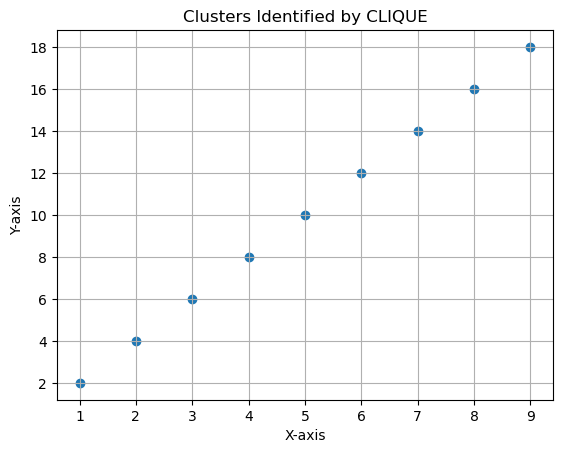

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class CLIQUE:
    def __init__(self, data, grid_size=10.0, min_points=3):
        self.data = data
        self.grid_size = grid_size
        self.min_points = min_points
        self.grid = {}

    def build_grid(self):
        for point in self.data:
            grid_cell = tuple((point // self.grid_size).astype(int))
            if grid_cell not in self.grid:
                self.grid[grid_cell] = []
            self.grid[grid_cell].append(point)

        self.dense_cells = {cell: points for cell, points in self.grid.items() if len(points) >= self.min_points}

    def get_clusters(self):
        visited = set()
        clusters = []

        for cell in self.dense_cells:
            if cell not in visited:
                cluster = self.expand_cluster(cell, visited)
                clusters.append(cluster)

        return clusters

    def expand_cluster(self, cell, visited):
        cluster = []
        cells_to_visit = [cell]
        while cells_to_visit:
            current_cell = cells_to_visit.pop()
            if current_cell not in visited:
                visited.add(current_cell)
                cluster.extend(self.dense_cells.get(current_cell, []))
                
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        neighbor = (current_cell[0] + dx, current_cell[1] + dy)
                        if neighbor in self.dense_cells and neighbor not in visited:
                            cells_to_visit.append(neighbor)

        return cluster

    def plot_clusters(self, clusters):
        for cluster in clusters:
            cluster = np.array(cluster)
            plt.scatter(cluster[:, 0], cluster[:, 1])
        
        plt.title('Clusters Identified by CLIQUE')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.grid(True)
        plt.show()

file_path = 'toa_do_diem.xlsx'
df = pd.read_excel(file_path)

data = df[['Toạ độ x', 'Toạ độ y']].to_numpy()

clique = CLIQUE(data)
clique.build_grid()
clusters = clique.get_clusters()

print(f"Các cụm được tìm thấy: {clusters}")

clique.plot_clusters(clusters)
